Training time: 0.006402730941772461 seconds
MAE: 51173.30689115325
RMSE: 70475.51536416243
R²: 0.6226006867385949


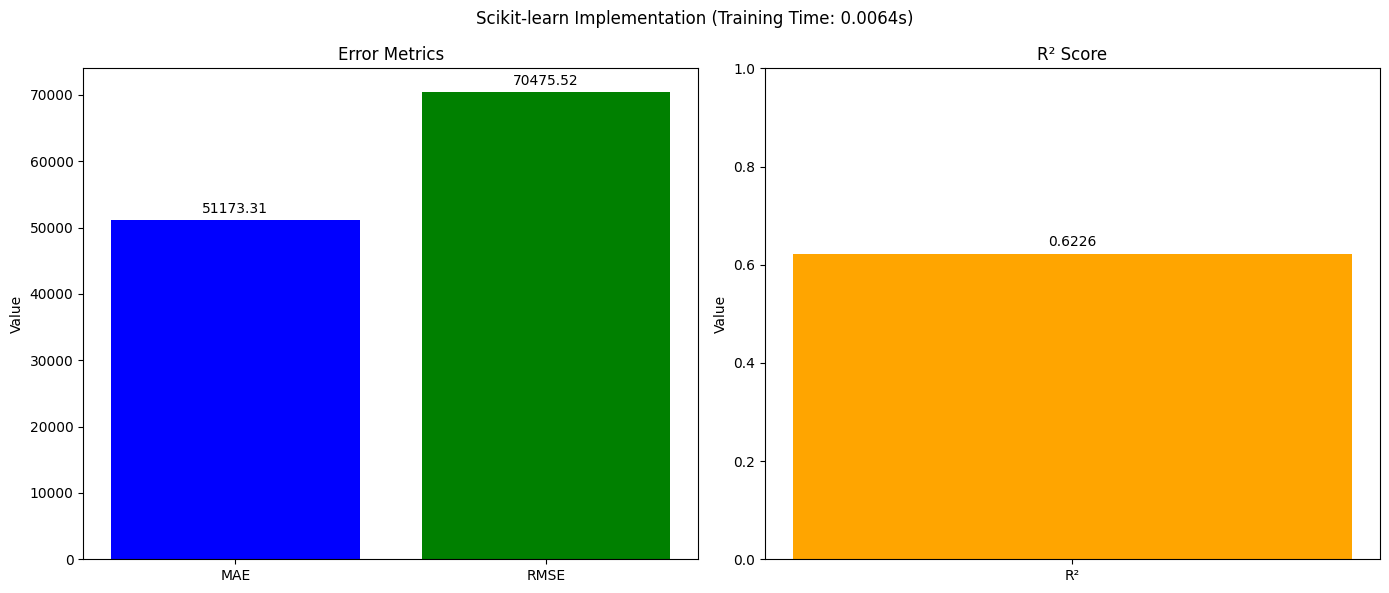

In [12]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('../input/california-housing-prices/housing.csv')
X = data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y = data.median_house_value
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
start_time = time.time()
model = LinearRegression()
model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Training time: {training_time} seconds")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
metrics = ['MAE', 'RMSE']
values = [mae, rmse]
bars1 = ax1.bar(metrics, values, color=['blue', 'green'])
ax1.set_title('Error Metrics')
ax1.set_ylabel('Value')
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
ax2.bar(['R²'], [r2], color='orange')
ax2.set_title('R² Score')
ax2.set_ylabel('Value')
ax2.set_ylim([0, 1]) 
for bar in ax2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.suptitle(f'Scikit-learn Implementation (Training Time: {training_time:.4f}s)')
plt.tight_layout()
plt.show()
